<a href="https://colab.research.google.com/github/gasshot/Python_Lib/blob/main/ex02_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%ED%8F%90%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 드라이브 마운트
from google.colab import drive;
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# 경로 확인
!pwd # "print working directory"

/content


In [10]:
# 경로 재설정
%cd /content/drive/MyDrive/Colab Notebooks/인공지능4차_딥러닝

/content/drive/MyDrive/Colab Notebooks/인공지능4차_딥러닝


In [11]:
#경로 변경 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/인공지능4차_딥러닝


### 목표 설정
- 폐암 환자의 생존을 예측하는 분류모델을 만들어보자
- 다층 퍼셉트론의 이진 분류에 익숙해지자

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [17]:
# 데이터 불러오기
data = pd.read_csv('./data/ThoraricSurgery.csv',header= None)
data
# 현재 데이터는 별도로 컬럼명이 존재하지 않는다.
# 이 상태로 데이터를 그냥 불러오면 첫번째 행이 자동으로 컬럼명으로 지정된다.
# header : 데이터를 불러오면서 컬럼명을 설정해주는 옵션
# 0~ 16번 컬럼 : 특징 / 특성 : 종양의 유형, 폐활량, 고통 강도 등 -> 수치값 지정
# 17번 컬럼 : 정답


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [25]:
# 데이터의 크기 확인
X = data.iloc[:,:16]
y = data.iloc[:,17]

In [26]:
# 결측치와 데이터 확인
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 58.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 470 entries, 0 to 469
Series name: 17
Non-Null Count  Dtype
--------------  -----
470 non-null    int64
dtypes: int64(1)
memory u

In [29]:
# 문제 / 정답 분리
# 평가 데이터 셋 30% / 랜덤 시드 30
from sklearn.model_selection import train_test_split





In [30]:
# 훈련 데이터 셋 / 평가 데이터 셋 분리
X_train, X_target, y_train, y_target = train_test_split(X,y,test_size=0.3,random_state=30)


In [49]:
# 분리된 데이터 확인
print(X_train.shape)
print(X_target.shape)
print(y_train.shape)
print(y_target.shape)

(329, 16)
(141, 16)
(329,)
(141,)


In [32]:
from tensorflow.keras import Sequential # 순차적인 신경망 모델
from tensorflow.keras.layers import Dense # 완전 연결 층

In [72]:
model = Sequential();

In [73]:
# 뉴런 개수 10~ 50 개 사이로 설정
# 입력층 input_dim 설정 확인 잘하기
# 중간층은 3 ~ 5개층 사이로 구축
# 출력층 - 이진 분류에 맞춰 설정

model.add(Dense(units=50,activation= 'relu', input_dim = 16))
#####################
model.add(Dense(units=50,activation= 'relu'))
model.add(Dense(units=25,activation= 'relu'))
model.add(Dense(units=12,activation= 'relu'))
#####################

model.add(Dense(units=1,activation= 'relu'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 50)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 12)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,000 (19.53 KB)

 Trainable params: 5,000 (19.53 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(loss = 'binary_crossentropy', # 손실함수 - 오차 측정 도구
              optimizer = 'adam', # 최적화 함수 - 성능 개선을 시켜주는 함수
              #  **확률적 경사 하강법(Stochastic Gradient Descent)**
              metrics=['accuracy']) # 평가지표

In [75]:
# 모델 학습(epochs=100)
h = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7303 - loss: 4.0122
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8371 - loss: 2.6254 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8422 - loss: 2.5432 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8248 - loss: 2.8242 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8481 - loss: 2.4486 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8126 - loss: 3.0209 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 2.4909 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8524 - loss: 2.3797 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8163 - loss: 2.9614 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 2.4909 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8409 - loss: 2.5636 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

In [69]:
h.history['accuracy']
h.history['loss']

[0.9879699349403381,
 0.8698151707649231,
 0.7785574793815613,
 0.7063440680503845,
 0.6490483283996582,
 0.6053630113601685,
 0.5710981488227844,
 0.5440803170204163,
 0.5233168601989746,
 0.5071719288825989,
 0.4924273192882538,
 0.48099324107170105,
 0.471731036901474,
 0.4646528661251068,
 0.45905038714408875,
 0.45402461290359497,
 0.4496023952960968,
 0.445846825838089,
 0.4428211450576782,
 0.44045504927635193,
 0.4383062720298767,
 0.43647047877311707,
 0.43504515290260315,
 0.4337103068828583,
 0.43253564834594727,
 0.4317326843738556,
 0.4310666024684906,
 0.4303298592567444,
 0.42968422174453735,
 0.42914295196533203,
 0.42878180742263794,
 0.42843425273895264,
 0.428082674741745,
 0.4278542697429657,
 0.4276541769504547,
 0.42745673656463623,
 0.4272701144218445,
 0.42702147364616394,
 0.4268399477005005,
 0.42670878767967224,
 0.4266003966331482,
 0.4266076683998108,
 0.42651084065437317,
 0.42649897933006287,
 0.42651116847991943,
 0.42649972438812256,
 0.4264796376228332

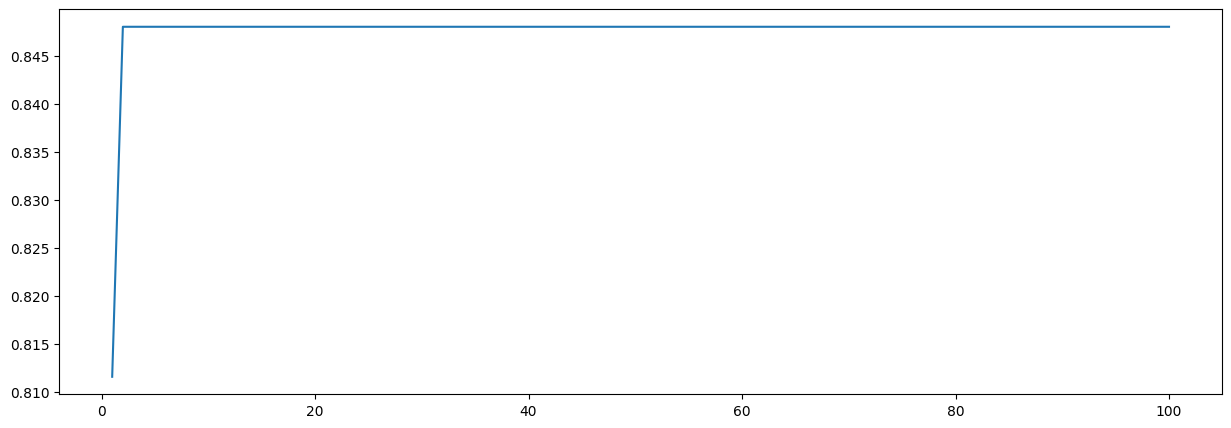

In [76]:
# 모델 시각화
plt.figure(figsize= (15, 5))

plt.plot(range(1, 101), h.history['accuracy'])

plt.show()

In [77]:
# 모델 평가
model.evaluate(X_target, y_target)[1] #  정확도만 표시

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8503 - loss: 2.4131  


0.8581560254096985

### 이번 시간 놓치지 말 것
신경망의 출력층 구조
1. 회귀
- 출력층 뉴런의 갯수 :1
- 출력층의 활성화 함수 : linear(항등함수) - 생락 가능
- loss(손실함수) : mse(평군 제곱 오차)

2. 이진 분류
- 출력층 뉴런의 갯수 :1
- 출력층의 활성화 함수 : 'sigmoid'
- loss(손실함수) : 'binary_crossentropy'